In [1]:
import numpy as np
import pandas as pd

In [2]:
from itertools import combinations

import networkx as nx
from sklearn.metrics import f1_score

from pgmpy.estimators import PC, HillClimbSearch, ExhaustiveSearch
from pgmpy.estimators import K2Score
from pgmpy.utils import get_example_model
from pgmpy.sampling import BayesianModelSampling

In [3]:
df  = pd.read_csv("SDOH_Data.csv",encoding='latin-1')

In [4]:
df

YEAR    TRACTFIPS  COUNTYFIPS  STATEFIPS              STATE  \
0      2020   1001020100        1001          1            Alabama   
1      2020   1001020200        1001          1            Alabama   
2      2020   1001020300        1001          1            Alabama   
3      2020   1001020400        1001          1            Alabama   
4      2020   1001020501        1001          1            Alabama   
...     ...          ...         ...        ...                ...   
85523  2020  78030960900       78030         78  US Virgin Islands   
85524  2020  78030961000       78030         78  US Virgin Islands   
85525  2020  78030961100       78030         78  US Virgin Islands   
85526  2020  78030961200       78030         78  US Virgin Islands   
85527  2020  78030990000       78030         78  US Virgin Islands   

                  COUNTY REGION  TERRITORY  ACS_TOT_POP_WT  \
0         Autauga County  South          0          1941.0   
1         Autauga County  South          0          1757.0   
2         Autauga County  South          0          3694.0   
3         Autauga County  South          0          3539.0   
4         Autauga County  South          0          4306.0   
...                  ...    ...        ...             ...   
85523  St. Thomas Island    NaN          1             NaN   
85524  St. Thomas Island    NaN          1             NaN   
85525  St. Thomas Island    NaN          1             NaN   
85526  St. Thomas Island    NaN          1             NaN   
85527  St. Thomas Island    NaN          1             NaN   

       ACS_TOT_POP_US_ABOVE1  ...  WUSTL_AVG_PM25  HIFLD_DIST_UC_TRACT  \
0                     1928.0  ...            6.79                 3.52   
1                     1753.0  ...            7.15                 2.64   
2                     3672.0  ...            7.12                 1.99   
3                     3519.0  ...            7.30                 0.97   
4                     4158.0  ...            7.58                 0.69   
...                      ...  ...             ...                  ...   
85523                    NaN  ...             NaN                  NaN   
85524                    NaN  ...             NaN                  NaN   
85525                    NaN  ...             NaN                  NaN   
85526                    NaN  ...             NaN                  NaN   
85527                    NaN  ...             NaN                  NaN   

       POS_DIST_ED_TRACT  POS_DIST_MEDSURG_ICU_TRACT  POS_DIST_TRAUMA_TRACT  \
0                   2.25                        2.25                  12.72   
1                   1.36                        1.36                  11.89   
2                   0.85                        0.85                  11.48   
3                   0.55                        0.55                  10.55   
4                   1.79                        1.79                   8.95   
...                  ...                         ...                    ...   
85523                NaN                         NaN                    NaN   
85524                NaN                         NaN                    NaN   
85525                NaN                         NaN                    NaN   
85526                NaN                         NaN                    NaN   
85527                NaN                         NaN                    NaN   

       POS_DIST_PED_ICU_TRACT  POS_DIST_OBSTETRICS_TRACT  \
0                       55.04                      12.72   
1                       55.65                      11.89   
2                       55.75                      11.48   
3                       56.49                      10.55   
4                       57.99                       8.95   
...                       ...                        ...   
85523                     NaN                        NaN   
85524                     NaN                        NaN   
85525                     NaN              

In [5]:
List = ["ACS_PCT_CHILD_1FAM","ACS_PCT_GRANDP_RESPS_NO_P","ACS_PCT_BACHELOR_DGR","ACS_PCT_RENTER_HU_CHILD","ACS_PCT_EMPLOYED","ACS_PCT_UNINSURED","ACS_MEDIAN_HH_INC","ACS_MEDIAN_HOME_VALUE",
"ACS_PCT_HH_SMARTPHONE","ACS_PCT_COMMT_60MINUP","ACS_PCT_1UP_PERS_1ROOM","WUSTL_AVG_PM25","ACS_PCT_WHITE_COMB","ACS_PCT_IN_COUNTY_MOVE","ACS_PCT_TAXICAB_2WORK","ACS_PCT_WORK_NO_CAR",
"ACS_PCT_HH_FOOD_STMP","ACS_PCT_HU_NO_FUEL","ACS_PCT_HU_BUILT_1979","ACS_PCT_ASIAN","ACS_PCT_HU_PLUMBING","ACS_PCT_GRANDP_RESPS_NO_P","ACS_PCT_CHILD_1FAM","ACS_PCT_ADMIN","ACS_PCT_PUBLIC_ONLY",
"ACS_MEDIAN_RENT","ACS_PCT_HH_PC","ACS_PCT_ART","ACS_PCT_HISPANIC","ACS_PCT_DIF_STATE","ACS_PCT_COMMT_60MINUP","POS_DIST_CLINIC_TRACT","ACS_PCT_HH_FOOD_STMP_BLW_POV",
"ACS_PCT_HU_UTILITY_GAS","ACS_PCT_HU_KITCHEN","ACS_PCT_NO_WORK_NO_SCHL_16_19","ACS_PCT_OWNER_HU_COST_30PCT","ACS_PCT_HH_TABLET","ACS_TOT_CIVIL_NONINST_POP_POV","ACS_PCT_HU_NO_VEH"]

In [6]:
List = list(set(List))

In [88]:
print(List)

['ACS_PCT_CHILD_1FAM', 'ACS_PCT_COMMT_60MINUP', 'POS_DIST_CLINIC_TRACT', 'ACS_PCT_EMPLOYED', 'ACS_PCT_GRANDP_RESPS_NO_P', 'ACS_PCT_ADMIN', 'ACS_PCT_IN_COUNTY_MOVE', 'ACS_PCT_HH_SMARTPHONE', 'ACS_PCT_TAXICAB_2WORK', 'WUSTL_AVG_PM25', 'ACS_PCT_HU_NO_FUEL', 'ACS_PCT_ART', 'ACS_PCT_OWNER_HU_COST_30PCT', 'ACS_PCT_HU_KITCHEN', 'ACS_PCT_UNINSURED', 'ACS_TOT_CIVIL_NONINST_POP_POV', 'ACS_PCT_NO_WORK_NO_SCHL_16_19', 'ACS_PCT_HH_FOOD_STMP', 'ACS_PCT_1UP_PERS_1ROOM', 'ACS_MEDIAN_HH_INC', 'ACS_PCT_RENTER_HU_CHILD', 'ACS_PCT_WHITE_COMB', 'ACS_MEDIAN_RENT', 'ACS_MEDIAN_HOME_VALUE', 'ACS_PCT_HH_TABLET', 'ACS_PCT_DIF_STATE', 'ACS_PCT_BACHELOR_DGR', 'ACS_PCT_ASIAN', 'ACS_PCT_PUBLIC_ONLY', 'ACS_PCT_HH_FOOD_STMP_BLW_POV', 'ACS_PCT_HISPANIC', 'ACS_PCT_HU_BUILT_1979', 'ACS_PCT_HU_UTILITY_GAS', 'ACS_PCT_HH_PC', 'ACS_PCT_WORK_NO_CAR', 'ACS_PCT_HU_NO_VEH', 'ACS_PCT_HU_PLUMBING']


In [30]:
df2 = df

In [31]:
df2 = df2[List]

In [32]:
df2

ACS_PCT_CHILD_1FAM  ACS_PCT_COMMT_60MINUP  POS_DIST_CLINIC_TRACT  \
0                   16.27                   0.36                  10.30   
1                   24.31                   2.32                  10.99   
2                   44.26                   6.54                  10.98   
3                   34.60                   7.09                   9.95   
4                   31.35                   1.17                   8.55   
...                   ...                    ...                    ...   
85523                 NaN                    NaN                    NaN   
85524                 NaN                    NaN                    NaN   
85525                 NaN                    NaN                    NaN   
85526                 NaN                    NaN                    NaN   
85527                 NaN                    NaN                    NaN   

       ACS_PCT_EMPLOYED  ACS_PCT_GRANDP_RESPS_NO_P  ACS_PCT_ADMIN  \
0                 97.89                       0.00           2.04   
1                 95.96                       0.00           4.94   
2                 97.34                      23.62          13.14   
3                 97.65                      68.75           9.14   
4                 99.01                        NaN          18.64   
...                 ...                        ...            ...   
85523               NaN                        NaN            NaN   
85524               NaN                        NaN            NaN   
85525               NaN                        NaN            NaN   
85526               NaN                        NaN            NaN   
85527               NaN                        NaN            NaN   

       ACS_PCT_IN_COUNTY_MOVE  ACS_PCT_HH_SMARTPHONE  ACS_PCT_TAXICAB_2WORK  \
0                        2.02                  82.25                   1.21   
1                        8.90                  84.12                   0.00   
2                       14.95                  85.42                   1.71   
3                        2.07                  73.23                   4.42   
4                        5.77                  88.69                   0.00   
...                       ...                    ...                    ...   
85523                     NaN                    NaN                    NaN   
85524                     NaN                    NaN                    NaN   
85525                     NaN                    NaN                    NaN   
85526                     NaN                    NaN                    NaN   
85527                     NaN                    NaN                    NaN   

       WUSTL_AVG_PM25  ...  ACS_PCT_ASIAN  ACS_PCT_PUBLIC_ONLY  \
0                6.79  ...           2.11                22.87   
1                7.15  ...           0.00                38.03   
2                7.12  ...           1.19                24.23   
3                7.30  ...           0.48                14.66   
4                7.58  ...           1.86                20.93   
...               ...  ...            ...                  ...   
85523             NaN  ...            NaN                  NaN   
85524             NaN  ...            NaN                  NaN   
85525             NaN  ...            NaN                  NaN   
85526             NaN  ...            NaN                  NaN   
85527             NaN  ...            NaN                  NaN   

       ACS_PCT_HH_FOOD_STMP_BLW_POV  ACS_PCT_HISPANIC  ACS_PCT_HU_BUILT_1979  \
0                             10.10              1.70                  50.22   
1                             13.61              1.71                  73.12   
2                              6.59              4.87                  63.66   
3                              0.67              0.48                  75.37   
4                              8.73              0.84                  31.54   
...                             ...               ...  

In [35]:
df2.dropna(inplace=True)

C:\Users\varsh\AppData\Local\Temp\ipykernel_17716\1761232742.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(inplace=True)


In [37]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63908 entries, 0 to 84413
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ACS_PCT_CHILD_1FAM             63908 non-null  float64
 1   ACS_PCT_COMMT_60MINUP          63908 non-null  float64
 2   POS_DIST_CLINIC_TRACT          63908 non-null  float64
 3   ACS_PCT_EMPLOYED               63908 non-null  float64
 4   ACS_PCT_GRANDP_RESPS_NO_P      63908 non-null  float64
 5   ACS_PCT_ADMIN                  63908 non-null  float64
 6   ACS_PCT_IN_COUNTY_MOVE         63908 non-null  float64
 7   ACS_PCT_HH_SMARTPHONE          63908 non-null  float64
 8   ACS_PCT_TAXICAB_2WORK          63908 non-null  float64
 9   WUSTL_AVG_PM25                 63908 non-null  float64
 10  ACS_PCT_HU_NO_FUEL             63908 non-null  float64
 11  ACS_PCT_ART                    63908 non-null  float64
 12  ACS_PCT_OWNER_HU_COST_30PCT    63908 non-null  floa

In [38]:
List2 = ["WUSTL_AVG_PM25","ACS_MEDIAN_RENT","ACS_MEDIAN_HH_INC","ACS_MEDIAN_HOME_VALUE","POS_DIST_CLINIC_TRACT","ACS_TOT_CIVIL_NONINST_POP_POV"]

In [39]:
for str in List2:
    min_val = df2[str].min()
    max_val = df2[str].max()
    df2[str] = (df2[str]-min_val)/(max_val-min_val)

C:\Users\varsh\AppData\Local\Temp\ipykernel_17716\834256529.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[str] = (df2[str]-min_val)/(max_val-min_val)


In [41]:
List3 = ['ACS_PCT_HU_BUILT_1979','ACS_PCT_HH_PC',
 'ACS_PCT_1UP_PERS_1ROOM',
 'ACS_PCT_HU_KITCHEN',
 'ACS_PCT_HU_NO_FUEL',
 'ACS_PCT_IN_COUNTY_MOVE',
 'ACS_PCT_HH_FOOD_STMP_BLW_POV',
 'ACS_PCT_HH_FOOD_STMP',
 'ACS_PCT_ASIAN',
 'ACS_PCT_WHITE_COMB',
 'ACS_PCT_HISPANIC',
 'ACS_PCT_OWNER_HU_COST_30PCT',
 'ACS_PCT_ART',
 'ACS_PCT_DIF_STATE',
 'ACS_PCT_PUBLIC_ONLY',
 'ACS_PCT_TAXICAB_2WORK',
 'ACS_PCT_HH_TABLET',
 'ACS_PCT_HU_NO_VEH',
 'ACS_PCT_CHILD_1FAM',
 'ACS_PCT_HU_PLUMBING',
 'ACS_PCT_WORK_NO_CAR',
 'ACS_PCT_HU_UTILITY_GAS',
 'ACS_PCT_HH_SMARTPHONE',
 'ACS_PCT_EMPLOYED',
 'ACS_PCT_BACHELOR_DGR',
 'ACS_PCT_GRANDP_RESPS_NO_P',
 'ACS_PCT_RENTER_HU_CHILD',
 'ACS_PCT_COMMT_60MINUP',
 'ACS_PCT_NO_WORK_NO_SCHL_16_19',
 'ACS_PCT_UNINSURED',
 'ACS_PCT_ADMIN']

In [89]:
print(List3)

['ACS_PCT_HU_BUILT_1979', 'ACS_PCT_HH_PC', 'ACS_PCT_1UP_PERS_1ROOM', 'ACS_PCT_HU_KITCHEN', 'ACS_PCT_HU_NO_FUEL', 'ACS_PCT_IN_COUNTY_MOVE', 'ACS_PCT_HH_FOOD_STMP_BLW_POV', 'ACS_PCT_HH_FOOD_STMP', 'ACS_PCT_ASIAN', 'ACS_PCT_WHITE_COMB', 'ACS_PCT_HISPANIC', 'ACS_PCT_OWNER_HU_COST_30PCT', 'ACS_PCT_ART', 'ACS_PCT_DIF_STATE', 'ACS_PCT_PUBLIC_ONLY', 'ACS_PCT_TAXICAB_2WORK', 'ACS_PCT_HH_TABLET', 'ACS_PCT_HU_NO_VEH', 'ACS_PCT_CHILD_1FAM', 'ACS_PCT_HU_PLUMBING', 'ACS_PCT_WORK_NO_CAR', 'ACS_PCT_HU_UTILITY_GAS', 'ACS_PCT_HH_SMARTPHONE', 'ACS_PCT_EMPLOYED', 'ACS_PCT_BACHELOR_DGR', 'ACS_PCT_GRANDP_RESPS_NO_P', 'ACS_PCT_RENTER_HU_CHILD', 'ACS_PCT_COMMT_60MINUP', 'ACS_PCT_NO_WORK_NO_SCHL_16_19', 'ACS_PCT_UNINSURED', 'ACS_PCT_ADMIN']


In [43]:
for i in List3:
    df2[i] = df2[i]/100

C:\Users\varsh\AppData\Local\Temp\ipykernel_17716\3341147084.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[i] = df2[i]/100


In [44]:
df2

ACS_PCT_CHILD_1FAM  ACS_PCT_COMMT_60MINUP  POS_DIST_CLINIC_TRACT  \
0                  0.1627                 0.0036               0.126582   
1                  0.2431                 0.0232               0.135062   
2                  0.4426                 0.0654               0.134939   
3                  0.3460                 0.0709               0.122281   
7                  0.1604                 0.0415               0.127565   
...                   ...                    ...                    ...   
84409              0.1527                 0.0219               0.069436   
84410              0.2468                 0.0098               0.002704   
84411              0.2614                 0.0612               0.006882   
84412              0.2050                 0.1459               0.167752   
84413              0.2282                 0.1739               0.011429   

       ACS_PCT_EMPLOYED  ACS_PCT_GRANDP_RESPS_NO_P  ACS_PCT_ADMIN  \
0                0.9789                     0.0000         0.0204   
1                0.9596                     0.0000         0.0494   
2                0.9734                     0.2362         0.1314   
3                0.9765                     0.6875         0.0914   
7                0.9722                     0.1690         0.0437   
...                 ...                        ...            ...   
84409            0.9665                     0.2759         0.0395   
84410            0.9753                     0.3600         0.0816   
84411            0.9295                     0.6944         0.1048   
84412            0.9683                     0.1739         0.0476   
84413            0.9554                     0.0000         0.0510   

       ACS_PCT_IN_COUNTY_MOVE  ACS_PCT_HH_SMARTPHONE  ACS_PCT_TAXICAB_2WORK  \
0                      0.0202                 0.8225                 0.0121   
1                      0.0890                 0.8412                 0.0000   
2                      0.1495                 0.8542                 0.0171   
3                      0.0207                 0.7323                 0.0442   
7                      0.0423                 0.8346                 0.0583   
...                       ...                    ...                    ...   
84409                  0.0336                 0.7457                 0.0363   
84410                  0.0394                 0.8015                 0.0303   
84411                  0.1605                 0.8877                 0.0481   
84412                  0.0248                 0.7691                 0.0314   
84413                  0.1204                 0.7801                 0.0333   

       WUSTL_AVG_PM25  ...  ACS_PCT_ASIAN  ACS_PCT_PUBLIC_ONLY  \
0            0.077646  ...         0.0211               0.2287   
1            0.086327  ...         0.0000               0.3803   
2            0.085604  ...         0.0119               0.2423   
3            0.089945  ...         0.0048               0.1466   
7            0.093079  ...         0.0031               0.3781   
...               ...  ...            ...                  ...   
84409        0.030383  ...         0.0000               0.2121   
84410        0.028454  ...         0.0000               0.1218   
84411        0.028695  ...         0.0000               0.2023   
84412        0.092356  ...         0.0205               0.2228   
84413        0.088257  ...         0.0125               0.1471   

       ACS_PCT_HH_FOOD_STMP_BLW_POV  ACS_PCT_HISPANIC  ACS_PCT_HU_BUILT_1979  \
0                            0.1010            0.0170                 0.5022   
1                            0.1361            0.0171                 0.7312   
2                            0.0659            0.0487                 0.6366   
3                            0.0067            0.0048                 0.7537   
7                            0.1609            0.0526                 0.4120   
...                             ...               ...  

In [90]:
print(List)

['ACS_PCT_CHILD_1FAM', 'ACS_PCT_COMMT_60MINUP', 'POS_DIST_CLINIC_TRACT', 'ACS_PCT_EMPLOYED', 'ACS_PCT_GRANDP_RESPS_NO_P', 'ACS_PCT_ADMIN', 'ACS_PCT_IN_COUNTY_MOVE', 'ACS_PCT_HH_SMARTPHONE', 'ACS_PCT_TAXICAB_2WORK', 'WUSTL_AVG_PM25', 'ACS_PCT_HU_NO_FUEL', 'ACS_PCT_ART', 'ACS_PCT_OWNER_HU_COST_30PCT', 'ACS_PCT_HU_KITCHEN', 'ACS_PCT_UNINSURED', 'ACS_TOT_CIVIL_NONINST_POP_POV', 'ACS_PCT_NO_WORK_NO_SCHL_16_19', 'ACS_PCT_HH_FOOD_STMP', 'ACS_PCT_1UP_PERS_1ROOM', 'ACS_MEDIAN_HH_INC', 'ACS_PCT_RENTER_HU_CHILD', 'ACS_PCT_WHITE_COMB', 'ACS_MEDIAN_RENT', 'ACS_MEDIAN_HOME_VALUE', 'ACS_PCT_HH_TABLET', 'ACS_PCT_DIF_STATE', 'ACS_PCT_BACHELOR_DGR', 'ACS_PCT_ASIAN', 'ACS_PCT_PUBLIC_ONLY', 'ACS_PCT_HH_FOOD_STMP_BLW_POV', 'ACS_PCT_HISPANIC', 'ACS_PCT_HU_BUILT_1979', 'ACS_PCT_HU_UTILITY_GAS', 'ACS_PCT_HH_PC', 'ACS_PCT_WORK_NO_CAR', 'ACS_PCT_HU_NO_VEH', 'ACS_PCT_HU_PLUMBING']


In [46]:
nodes = List

In [47]:
df2.reset_index(drop=True,inplace=True)

In [48]:
df2

ACS_PCT_CHILD_1FAM  ACS_PCT_COMMT_60MINUP  POS_DIST_CLINIC_TRACT  \
0                  0.1627                 0.0036               0.126582   
1                  0.2431                 0.0232               0.135062   
2                  0.4426                 0.0654               0.134939   
3                  0.3460                 0.0709               0.122281   
4                  0.1604                 0.0415               0.127565   
...                   ...                    ...                    ...   
63903              0.1527                 0.0219               0.069436   
63904              0.2468                 0.0098               0.002704   
63905              0.2614                 0.0612               0.006882   
63906              0.2050                 0.1459               0.167752   
63907              0.2282                 0.1739               0.011429   

       ACS_PCT_EMPLOYED  ACS_PCT_GRANDP_RESPS_NO_P  ACS_PCT_ADMIN  \
0                0.9789                     0.0000         0.0204   
1                0.9596                     0.0000         0.0494   
2                0.9734                     0.2362         0.1314   
3                0.9765                     0.6875         0.0914   
4                0.9722                     0.1690         0.0437   
...                 ...                        ...            ...   
63903            0.9665                     0.2759         0.0395   
63904            0.9753                     0.3600         0.0816   
63905            0.9295                     0.6944         0.1048   
63906            0.9683                     0.1739         0.0476   
63907            0.9554                     0.0000         0.0510   

       ACS_PCT_IN_COUNTY_MOVE  ACS_PCT_HH_SMARTPHONE  ACS_PCT_TAXICAB_2WORK  \
0                      0.0202                 0.8225                 0.0121   
1                      0.0890                 0.8412                 0.0000   
2                      0.1495                 0.8542                 0.0171   
3                      0.0207                 0.7323                 0.0442   
4                      0.0423                 0.8346                 0.0583   
...                       ...                    ...                    ...   
63903                  0.0336                 0.7457                 0.0363   
63904                  0.0394                 0.8015                 0.0303   
63905                  0.1605                 0.8877                 0.0481   
63906                  0.0248                 0.7691                 0.0314   
63907                  0.1204                 0.7801                 0.0333   

       WUSTL_AVG_PM25  ...  ACS_PCT_ASIAN  ACS_PCT_PUBLIC_ONLY  \
0            0.077646  ...         0.0211               0.2287   
1            0.086327  ...         0.0000               0.3803   
2            0.085604  ...         0.0119               0.2423   
3            0.089945  ...         0.0048               0.1466   
4            0.093079  ...         0.0031               0.3781   
...               ...  ...            ...                  ...   
63903        0.030383  ...         0.0000               0.2121   
63904        0.028454  ...         0.0000               0.1218   
63905        0.028695  ...         0.0000               0.2023   
63906        0.092356  ...         0.0205               0.2228   
63907        0.088257  ...         0.0125               0.1471   

       ACS_PCT_HH_FOOD_STMP_BLW_POV  ACS_PCT_HISPANIC  ACS_PCT_HU_BUILT_1979  \
0                            0.1010            0.0170                 0.5022   
1                            0.1361            0.0171                 0.7312   
2                            0.0659            0.0487                 0.6366   
3                            0.0067            0.0048                 0.7537   
4                            0.1609            0.0526                 0.4120   
...                             ...               ...  

In [49]:
df2

ACS_PCT_CHILD_1FAM  ACS_PCT_COMMT_60MINUP  POS_DIST_CLINIC_TRACT  \
0                  0.1627                 0.0036               0.126582   
1                  0.2431                 0.0232               0.135062   
2                  0.4426                 0.0654               0.134939   
3                  0.3460                 0.0709               0.122281   
4                  0.1604                 0.0415               0.127565   
...                   ...                    ...                    ...   
63903              0.1527                 0.0219               0.069436   
63904              0.2468                 0.0098               0.002704   
63905              0.2614                 0.0612               0.006882   
63906              0.2050                 0.1459               0.167752   
63907              0.2282                 0.1739               0.011429   

       ACS_PCT_EMPLOYED  ACS_PCT_GRANDP_RESPS_NO_P  ACS_PCT_ADMIN  \
0                0.9789                     0.0000         0.0204   
1                0.9596                     0.0000         0.0494   
2                0.9734                     0.2362         0.1314   
3                0.9765                     0.6875         0.0914   
4                0.9722                     0.1690         0.0437   
...                 ...                        ...            ...   
63903            0.9665                     0.2759         0.0395   
63904            0.9753                     0.3600         0.0816   
63905            0.9295                     0.6944         0.1048   
63906            0.9683                     0.1739         0.0476   
63907            0.9554                     0.0000         0.0510   

       ACS_PCT_IN_COUNTY_MOVE  ACS_PCT_HH_SMARTPHONE  ACS_PCT_TAXICAB_2WORK  \
0                      0.0202                 0.8225                 0.0121   
1                      0.0890                 0.8412                 0.0000   
2                      0.1495                 0.8542                 0.0171   
3                      0.0207                 0.7323                 0.0442   
4                      0.0423                 0.8346                 0.0583   
...                       ...                    ...                    ...   
63903                  0.0336                 0.7457                 0.0363   
63904                  0.0394                 0.8015                 0.0303   
63905                  0.1605                 0.8877                 0.0481   
63906                  0.0248                 0.7691                 0.0314   
63907                  0.1204                 0.7801                 0.0333   

       WUSTL_AVG_PM25  ...  ACS_PCT_ASIAN  ACS_PCT_PUBLIC_ONLY  \
0            0.077646  ...         0.0211               0.2287   
1            0.086327  ...         0.0000               0.3803   
2            0.085604  ...         0.0119               0.2423   
3            0.089945  ...         0.0048               0.1466   
4            0.093079  ...         0.0031               0.3781   
...               ...  ...            ...                  ...   
63903        0.030383  ...         0.0000               0.2121   
63904        0.028454  ...         0.0000               0.1218   
63905        0.028695  ...         0.0000               0.2023   
63906        0.092356  ...         0.0205               0.2228   
63907        0.088257  ...         0.0125               0.1471   

       ACS_PCT_HH_FOOD_STMP_BLW_POV  ACS_PCT_HISPANIC  ACS_PCT_HU_BUILT_1979  \
0                            0.1010            0.0170                 0.5022   
1                            0.1361            0.0171                 0.7312   
2                            0.0659            0.0487                 0.6366   
3                            0.0067            0.0048                 0.7537   
4                            0.1609            0.0526                 0.4120   
...                             ...               ...  

In [50]:
TIERS_NUM = 2

def boundary_str(start, end, tier):
    return f'{tier}: {start:+0,.2f} to {end:+0,.2f}'

def relabel(v, boundaries):
    if v >= boundaries[0][0] and v <= boundaries[0][1]:
        return boundary_str(boundaries[0][0], boundaries[0][1], tier='A')
    elif v >= boundaries[1][0] and v <= boundaries[1][1]:
        return boundary_str(boundaries[1][0], boundaries[1][1], tier='B')
    else:
        return np.nan

def get_boundaries(tiers):
    prev_tier = tiers[0]
    boundaries = [(prev_tier[0], prev_tier[prev_tier.shape[0] - 1])]
    for index, tier in enumerate(tiers):
        if index is not 0:
            boundaries.append((prev_tier[prev_tier.shape[0] - 1], tier[tier.shape[0] - 1]))
            prev_tier = tier
    return boundaries

new_columns = {}
for i, content in enumerate(df2.items()):
    (label, series) = content
    values = np.sort(np.array([x for x in series.tolist() if not np.isnan(x)] , dtype=float))
    if values.shape[0] < TIERS_NUM:
        print(f'Error: there are not enough data for label {label}')
        break
    boundaries = get_boundaries(tiers=np.array_split(values, TIERS_NUM))
    new_columns[label] = [relabel(value, boundaries) for value in series.tolist()]

df3 = pd.DataFrame(data=new_columns)
df3.columns = nodes
df3.head(10)

<>:18: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:18: SyntaxWarning: "is not" with a literal. Did you mean "!="?
C:\Users\varsh\AppData\Local\Temp\ipykernel_17716\3004154902.py:18: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if index is not 0:


ACS_PCT_CHILD_1FAM ACS_PCT_COMMT_60MINUP POS_DIST_CLINIC_TRACT  \
0  A: +0.00 to +0.29     A: +0.00 to +0.07     B: +0.03 to +1.00   
1  A: +0.00 to +0.29     A: +0.00 to +0.07     B: +0.03 to +1.00   
2  B: +0.29 to +1.00     A: +0.00 to +0.07     B: +0.03 to +1.00   
3  B: +0.29 to +1.00     A: +0.00 to +0.07     B: +0.03 to +1.00   
4  A: +0.00 to +0.29     A: +0.00 to +0.07     B: +0.03 to +1.00   
5  B: +0.29 to +1.00     A: +0.00 to +0.07     B: +0.03 to +1.00   
6  A: +0.00 to +0.29     A: +0.00 to +0.07     B: +0.03 to +1.00   
7  B: +0.29 to +1.00     B: +0.07 to +0.69     B: +0.03 to +1.00   
8  A: +0.00 to +0.29     B: +0.07 to +0.69     B: +0.03 to +1.00   
9  B: +0.29 to +1.00     B: +0.07 to +0.69     B: +0.03 to +1.00   

    ACS_PCT_EMPLOYED ACS_PCT_GRANDP_RESPS_NO_P      ACS_PCT_ADMIN  \
0  B: +0.95 to +1.00         A: +0.00 to +0.00  A: +0.00 to +0.04   
1  B: +0.95 to +1.00         A: +0.00 to +0.00  B: +0.04 to +0.74   
2  B: +0.95 to +1.00         B: +0.00 to +1.00  B: +0.04 to +0.74   
3  B: +0.95 to +1.00         B: +0.00 to +1.00  B: +0.04 to +0.74   
4  B: +0.95 to +1.00         B: +0.00 to +1.00  B: +0.04 to +0.74   
5  A: +0.41 to +0.95         A: +0.00 to +0.00  B: +0.04 to +0.74   
6  B: +0.95 to +1.00         B: +0.00 to +1.00  B: +0.04 to +0.74   
7  B: +0.95 to +1.00         A: +0.00 to +0.00  B: +0.04 to +0.74   
8  B: +0.95 to +1.00         A: +0.00 to +0.00  B: +0.04 to +0.74   
9  A: +0.41 to +0.95         B: +0.00 to +1.00  B: +0.04 to +0.74   

  ACS_PCT_IN_COUNTY_MOVE ACS_PCT_HH_SMARTPHONE ACS_PCT_TAXICAB_2WORK  \
0      A: +0.00 to +0.06     A: +0.08 to +0.83     B: +0.01 to +0.56   
1      B: +0.06 to +0.59     B: +0.83 to +1.00     A: +0.00 to +0.01   
2      B: +0.06 to +0.59     B: +0.83 to +1.00     B: +0.01 to +0.56   
3      A: +0.00 to +0.06     A: +0.08 to +0.83     B: +0.01 to +0.56   
4      A: +0.00 to +0.06     B: +0.83 to +1.00     B: +0.01 to +0.56   
5      B: +0.06 to +0.59     A: +0.08 to +0.83     A: +0.00 to +0.01   
6      A: +0.00 to +0.06     B: +0.83 to +1.00     A: +0.00 to +0.01   
7      B: +0.06 to +0.59     B: +0.83 to +1.00     B: +0.01 to +0.56   
8      A: +0.00 to +0.06     B: +0.83 to +1.00     B: +0.01 to +0.56   
9      A: +0.00 to +0.06     B: +0.83 to +1.00     A: +0.00 to +0.01   

      WUSTL_AVG_PM25  ...      ACS_PCT_ASIAN ACS_PCT_PUBLIC_ONLY  \
0  A: +0.00 to +0.09  ...  B: +0.01 to +0.90   A: +0.00 to +0.24   
1  A: +0.00 to +0.09  ...  A: +0.00 to +0.01   B: +0.24 to +0.88   
2  A: +0.00 to +0.09  ...  A: +0.00 to +0.01   B: +0.24 to +0.88   
3  B: +0.09 to +1.00  ...  A: +0.00 to +0.01   A: +0.00 to +0.24   
4  B: +0.09 to +1.00  ...  A: +0.00 to +0.01   B: +0.24 to +0.88   
5  B: +0.09 to +1.00  ...  A: +0.00 to +0.01   B: +0.24 to +0.88   
6  A: +0.00 to +0.09  ...  A: +0.00 to +0.01   B: +0.24 to +0.88   
7  A: +0.00 to +0.09  ...  A: +0.00 to +0.01   A: +0.00 to +0.24   
8  A: +0.00 to +0.09  ...  A: +0.00 to +0.01   B: +0.24 to +0.88   
9  A: +0.00 to +0.09  ...  A: +0.00 to +0.01   A: +0.00 to +0.24   

  ACS_PCT_HH_FOOD_STMP_BLW_POV   ACS_PCT_HISPANIC ACS_PCT_HU_BUILT_1979  \
0            B: +0.04 to +0.70  A: +0.00 to +0.08     A: +0.00 to +0.58   
1            B: +0.04 to +0.70  A: +0.00 to +0.08     B: +0.58 to +1.00   
2            B: +0.04 to +0.70  A: +0.00 to +0.08     B: +0.58 to +1.00   
3            A: +0.00 to +0.04  A: +0.00 to +0.08     B: +0.58 to +1.00   
4            B: +0.04 to +0.70  A: +0.00 to +0.08     A: +0.00 to +0.58   
5            B: +0.04 to +0.70  A: +0.00 to +0.08     A: +0.00 to +0.58   
6            B: +0.04 to +0.70  A: +0.00 to +0.08     A: +0.00 to +0.58   
7            A: +0.00 to +0.04  A: +0.00 to +0.08     A: +0.00 to +0.58   
8            B: +0.04 to +0.70  A: +0.00 to +0.08     A: +0.00 to +0.58   
9            B: +0.04 to +0.70  A: +0.00 to +0.08     A: +0.00 to +0.58   

  ACS_PCT_HU_UTILITY_GAS      ACS_PCT_HH_PC ACS_PCT_WORK_NO_CAR  \
0      A: +0.00 to +0.51  A: +0.08 to +0.77   A: +0.00 to 

In [55]:
from pgmpy.estimators import BicScore

In [56]:
estimator = HillClimbSearch(df3)

In [57]:
best_model = estimator.estimate()

  0%|          | 0/1000000 [00:00<?, ?it/s]

In [58]:
print("Edges of the Bayesian network:")
for edge in best_model.edges():
    print(edge)

Edges of the Bayesian network:
('ACS_PCT_CHILD_1FAM', 'ACS_PCT_WHITE_COMB')
('ACS_PCT_CHILD_1FAM', 'ACS_PCT_IN_COUNTY_MOVE')
('ACS_PCT_CHILD_1FAM', 'ACS_PCT_ART')
('ACS_PCT_CHILD_1FAM', 'POS_DIST_CLINIC_TRACT')
('ACS_PCT_CHILD_1FAM', 'ACS_MEDIAN_HOME_VALUE')
('ACS_PCT_CHILD_1FAM', 'WUSTL_AVG_PM25')
('ACS_PCT_CHILD_1FAM', 'ACS_PCT_EMPLOYED')
('ACS_PCT_CHILD_1FAM', 'ACS_PCT_HU_BUILT_1979')
('ACS_PCT_COMMT_60MINUP', 'ACS_PCT_DIF_STATE')
('POS_DIST_CLINIC_TRACT', 'ACS_PCT_HU_BUILT_1979')
('POS_DIST_CLINIC_TRACT', 'ACS_PCT_HISPANIC')
('POS_DIST_CLINIC_TRACT', 'ACS_PCT_HU_UTILITY_GAS')
('POS_DIST_CLINIC_TRACT', 'ACS_PCT_IN_COUNTY_MOVE')
('POS_DIST_CLINIC_TRACT', 'ACS_PCT_ART')
('POS_DIST_CLINIC_TRACT', 'ACS_PCT_WHITE_COMB')
('POS_DIST_CLINIC_TRACT', 'WUSTL_AVG_PM25')
('POS_DIST_CLINIC_TRACT', 'ACS_PCT_TAXICAB_2WORK')
('ACS_PCT_EMPLOYED', 'ACS_PCT_NO_WORK_NO_SCHL_16_19')
('ACS_PCT_GRANDP_RESPS_NO_P', 'ACS_PCT_NO_WORK_NO_SCHL_16_19')
('ACS_PCT_IN_COUNTY_MOVE', 'WUSTL_AVG_PM25')
('ACS_PCT_IN_CO

In [59]:
print(f"Type of best_model: {type(best_model)}")
#print(f"Type of pos: {type(pos)}")

Type of best_model: <class 'pgmpy.base.DAG.DAG'>


In [60]:
print(best_model)

DAG with 37 nodes and 233 edges


In [61]:
import matplotlib.pyplot as plt

In [62]:
G = nx.DiGraph()

In [63]:
G.add_nodes_from(nodes)

In [64]:
G.add_edges_from(best_model.edges)

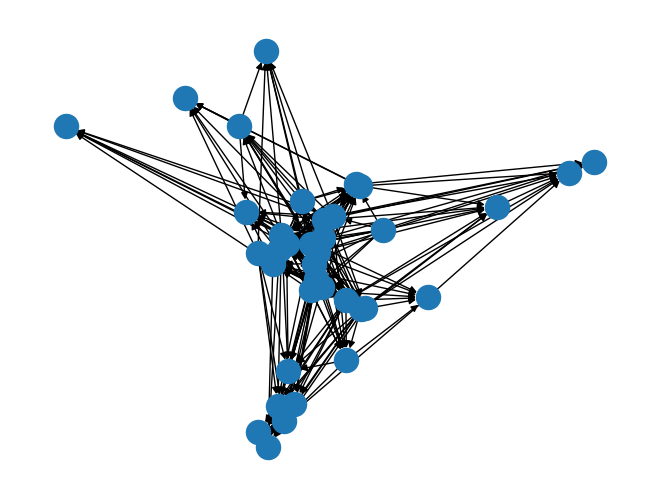

In [65]:
nx.draw(G)

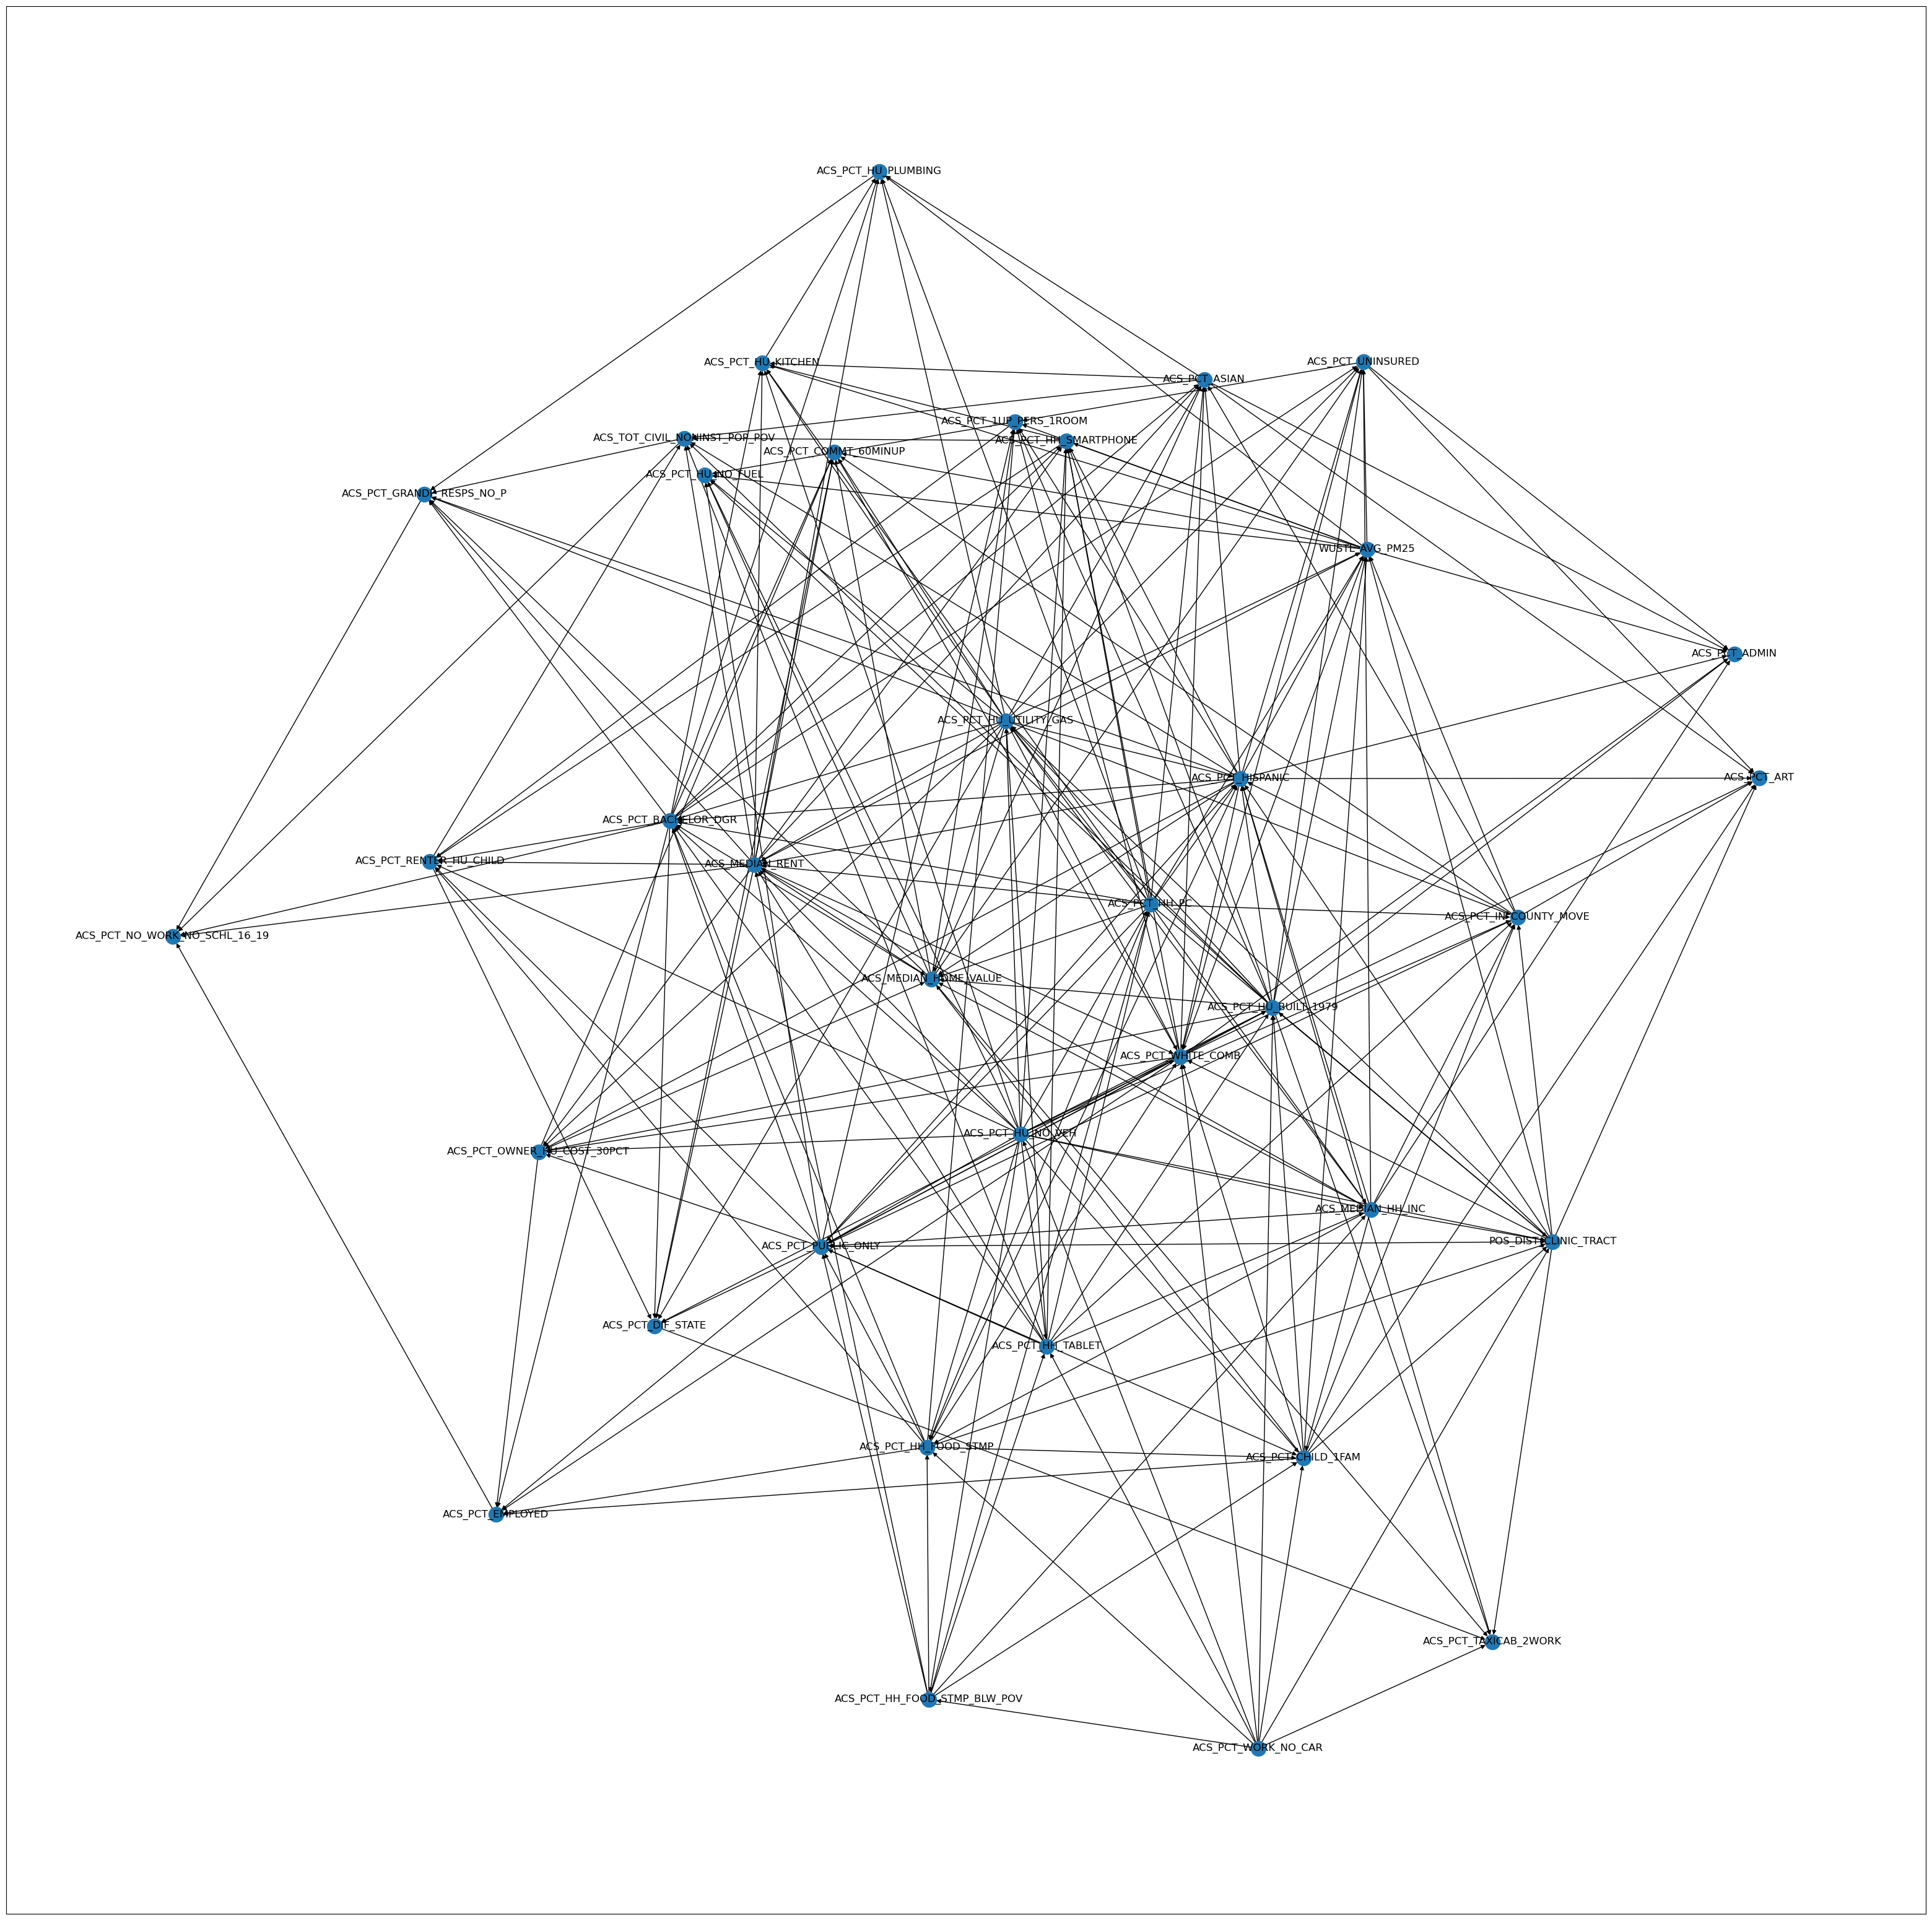

In [66]:
plt.figure(figsize=(40,40))
pos = nx.kamada_kawai_layout(G)
#node_options = {"node_colour":"black","node_size":30}
#edge_options = {"width":0.50,"alpha":.5,"edge_colour":"black"}
#node_label_options = {"font_size":15,
 #                     "font_color":"blue",
 #                     "verticalalignment":"bottom",
 #                     "horizontalalignment":"left"}
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos)
plt.show()

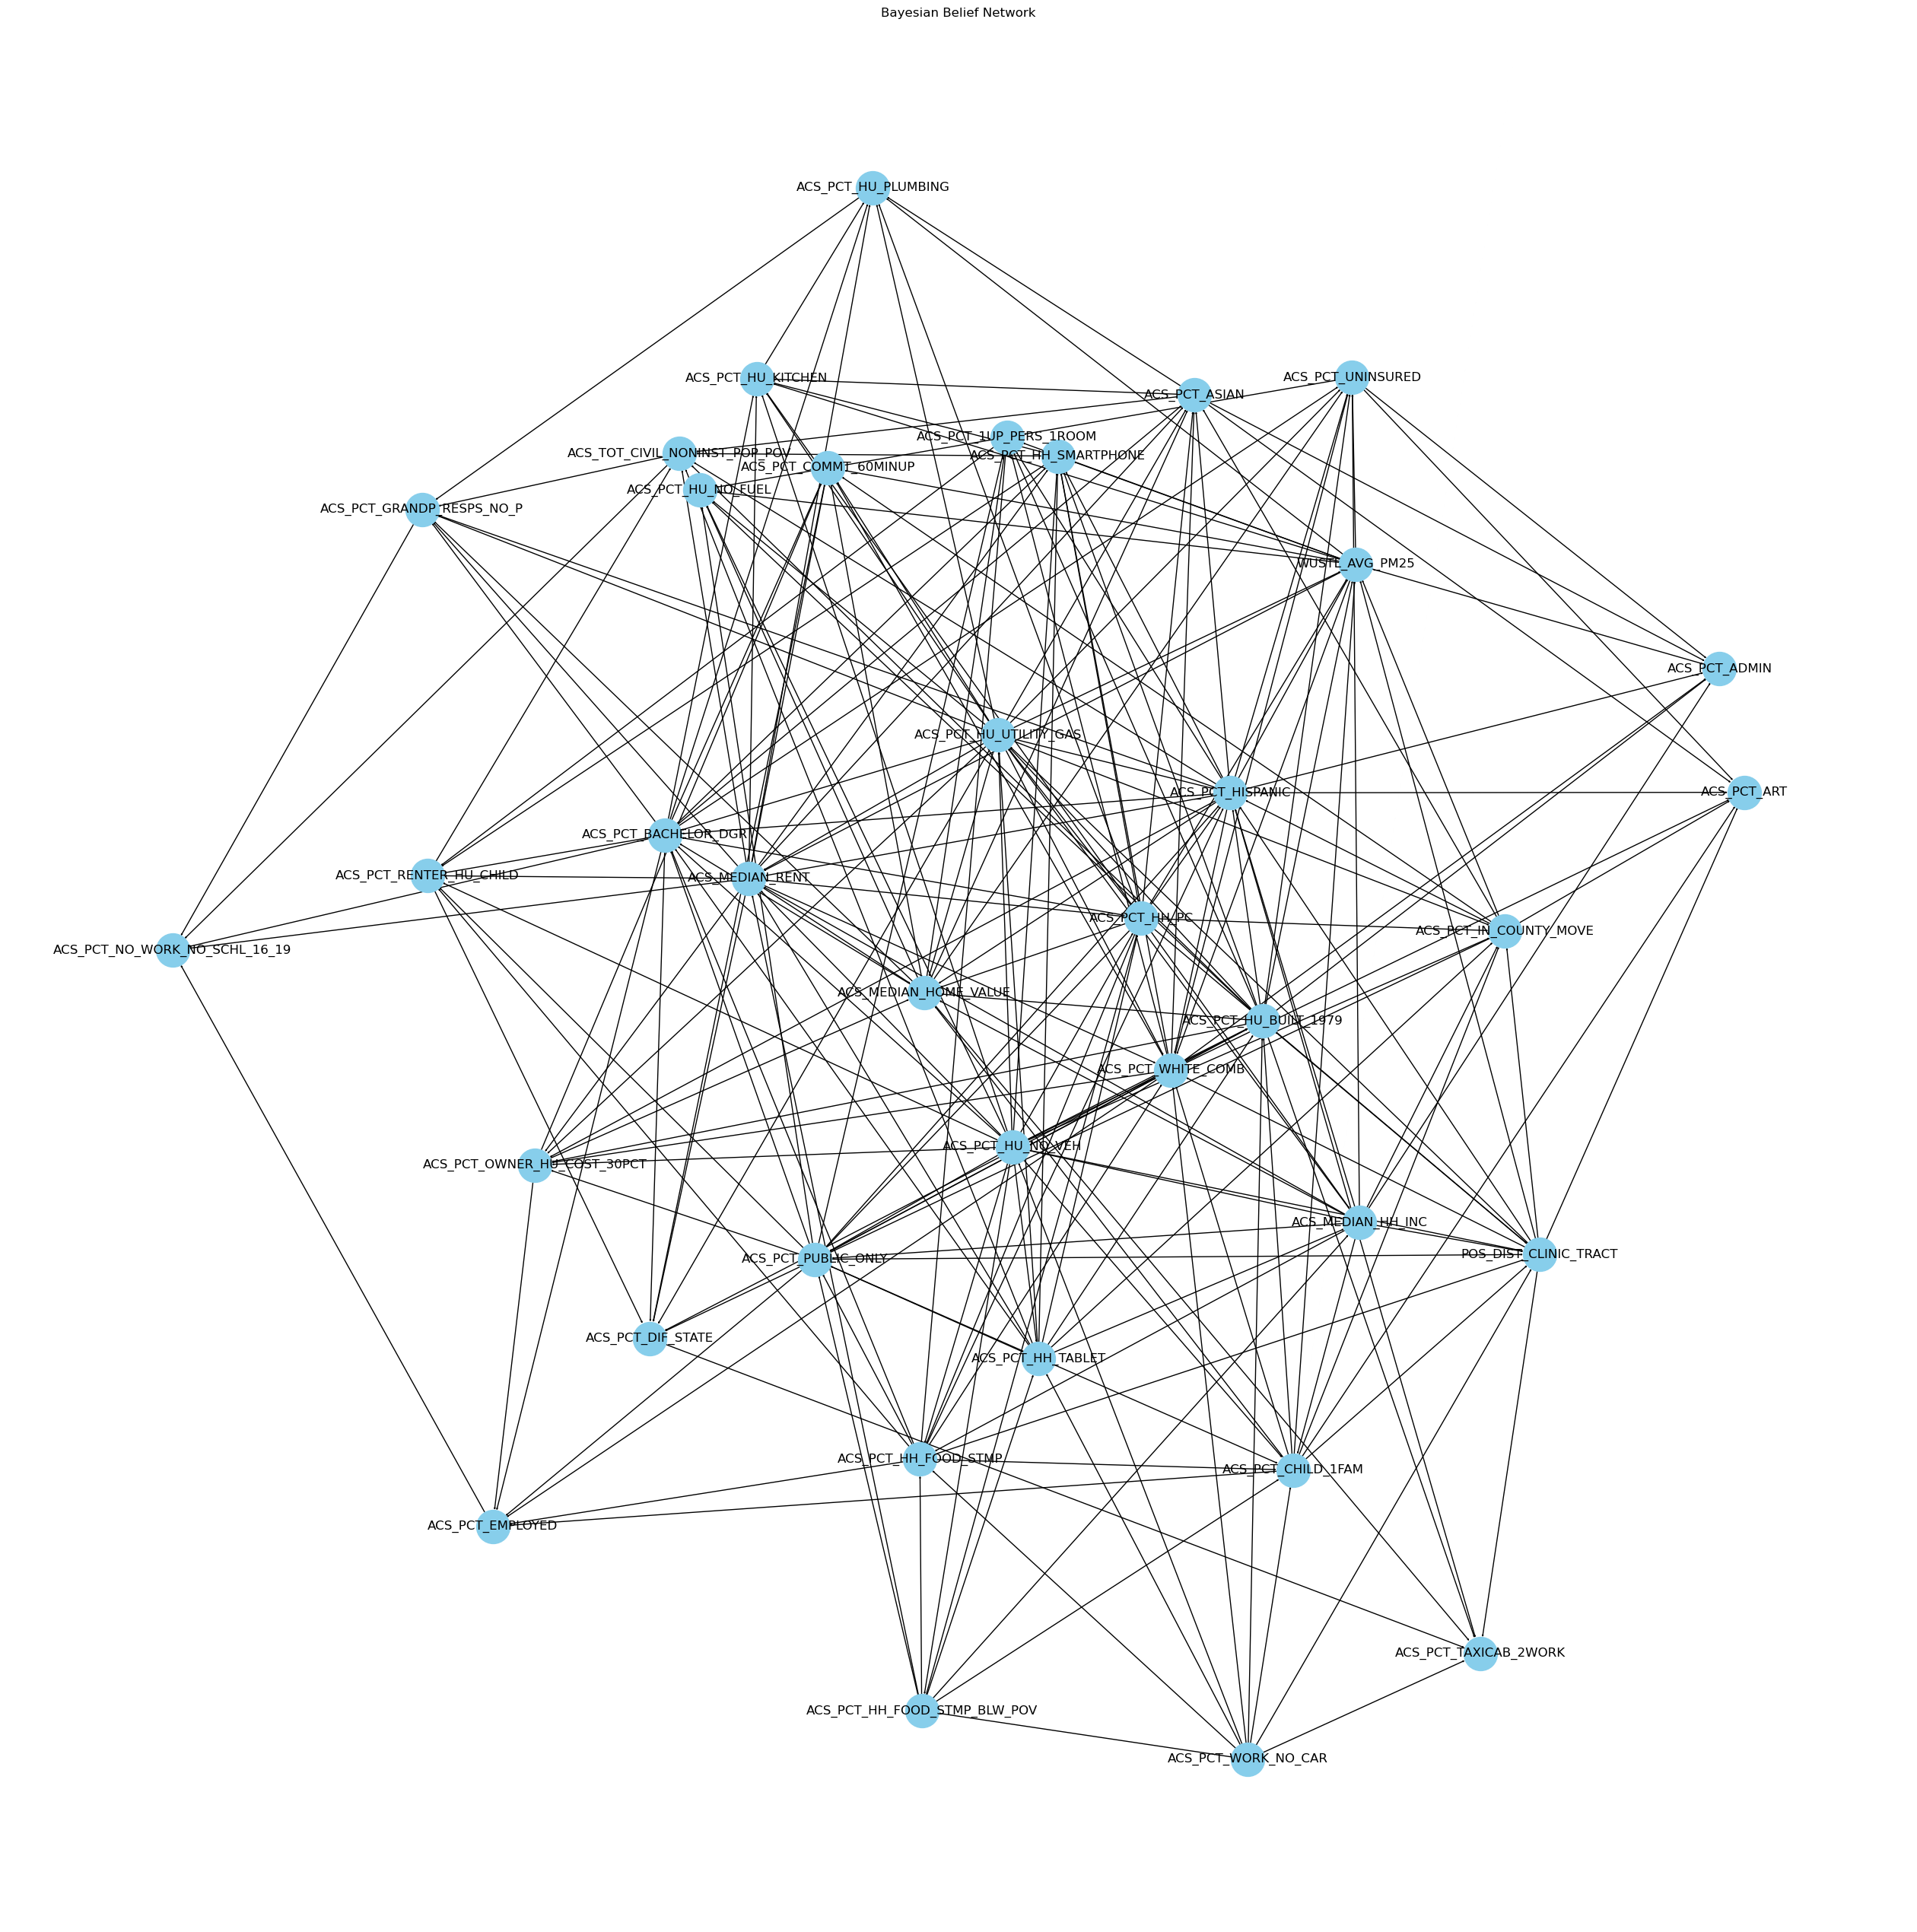

In [67]:
plt.figure(figsize=(25,25))
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='skyblue', font_size=12, arrowsize=2)
plt.title("Bayesian Belief Network")
plt.show()

In [68]:
from pgmpy.estimators import BayesianEstimator,MaximumLikelihoodEstimator
from pgmpy.models import BayesianNetwork

In [69]:
model = BayesianNetwork(best_model.edges)

In [70]:
Nodes = best_model.nodes

In [71]:
from IPython.core.display import display, HTML

C:\Users\varsh\AppData\Local\Temp\ipykernel_17716\2058709175.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [72]:
df3

ACS_PCT_CHILD_1FAM ACS_PCT_COMMT_60MINUP POS_DIST_CLINIC_TRACT  \
0      A: +0.00 to +0.29     A: +0.00 to +0.07     B: +0.03 to +1.00   
1      A: +0.00 to +0.29     A: +0.00 to +0.07     B: +0.03 to +1.00   
2      B: +0.29 to +1.00     A: +0.00 to +0.07     B: +0.03 to +1.00   
3      B: +0.29 to +1.00     A: +0.00 to +0.07     B: +0.03 to +1.00   
4      A: +0.00 to +0.29     A: +0.00 to +0.07     B: +0.03 to +1.00   
...                  ...                   ...                   ...   
63903  A: +0.00 to +0.29     A: +0.00 to +0.07     B: +0.03 to +1.00   
63904  A: +0.00 to +0.29     A: +0.00 to +0.07     A: +0.00 to +0.03   
63905  A: +0.00 to +0.29     A: +0.00 to +0.07     A: +0.00 to +0.03   
63906  A: +0.00 to +0.29     B: +0.07 to +0.69     B: +0.03 to +1.00   
63907  A: +0.00 to +0.29     B: +0.07 to +0.69     A: +0.00 to +0.03   

        ACS_PCT_EMPLOYED ACS_PCT_GRANDP_RESPS_NO_P      ACS_PCT_ADMIN  \
0      B: +0.95 to +1.00         A: +0.00 to +0.00  A: +0.00 to +0.04   
1      B: +0.95 to +1.00         A: +0.00 to +0.00  B: +0.04 to +0.74   
2      B: +0.95 to +1.00         B: +0.00 to +1.00  B: +0.04 to +0.74   
3      B: +0.95 to +1.00         B: +0.00 to +1.00  B: +0.04 to +0.74   
4      B: +0.95 to +1.00         B: +0.00 to +1.00  B: +0.04 to +0.74   
...                  ...                       ...                ...   
63903  B: +0.95 to +1.00         B: +0.00 to +1.00  B: +0.04 to +0.74   
63904  B: +0.95 to +1.00         B: +0.00 to +1.00  B: +0.04 to +0.74   
63905  A: +0.41 to +0.95         B: +0.00 to +1.00  B: +0.04 to +0.74   
63906  B: +0.95 to +1.00         B: +0.00 to +1.00  B: +0.04 to +0.74   
63907  B: +0.95 to +1.00         A: +0.00 to +0.00  B: +0.04 to +0.74   

      ACS_PCT_IN_COUNTY_MOVE ACS_PCT_HH_SMARTPHONE ACS_PCT_TAXICAB_2WORK  \
0          A: +0.00 to +0.06     A: +0.08 to +0.83     B: +0.01 to +0.56   
1          B: +0.06 to +0.59     B: +0.83 to +1.00     A: +0.00 to +0.01   
2          B: +0.06 to +0.59     B: +0.83 to +1.00     B: +0.01 to +0.56   
3          A: +0.00 to +0.06     A: +0.08 to +0.83     B: +0.01 to +0.56   
4          A: +0.00 to +0.06     B: +0.83 to +1.00     B: +0.01 to +0.56   
...                      ...                   ...                   ...   
63903      A: +0.00 to +0.06     A: +0.08 to +0.83     B: +0.01 to +0.56   
63904      A: +0.00 to +0.06     A: +0.08 to +0.83     B: +0.01 to +0.56   
63905      B: +0.06 to +0.59     B: +0.83 to +1.00     B: +0.01 to +0.56   
63906      A: +0.00 to +0.06     A: +0.08 to +0.83     B: +0.01 to +0.56   
63907      B: +0.06 to +0.59     A: +0.08 to +0.83     B: +0.01 to +0.56   

          WUSTL_AVG_PM25  ...      ACS_PCT_ASIAN ACS_PCT_PUBLIC_ONLY  \
0      A: +0.00 to +0.09  ...  B: +0.01 to +0.90   A: +0.00 to +0.24   
1      A: +0.00 to +0.09  ...  A: +0.00 to +0.01   B: +0.24 to +0.88   
2      A: +0.00 to +0.09  ...  A: +0.00 to +0.01   B: +0.24 to +0.88   
3      B: +0.09 to +1.00  ...  A: +0.00 to +0.01   A: +0.00 to +0.24   
4      B: +0.09 to +1.00  ...  A: +0.00 to +0.01   B: +0.24 to +0.88   
...                  ...  ...                ...                 ...   
63903  A: +0.00 to +0.09  ...  A: +0.00 to +0.01   A: +0.00 to +0.24   
63904  A: +0.00 to +0.09  ...  A: +0.00 to +0.01   A: +0.00 to +0.24   
63905  A: +0.00 to +0.09  ...  A: +0.00 to +0.01   A: +0.00 to +0.24   
63906  B: +0.09 to +1.00  ...  B: +0.01 to +0.90   A: +0.00 to +0.24   
63907  A: +0.00 to +0.09  ...  B: +0.01 to +0.90   A: +0.00 to +0.24   

      ACS_PCT_HH_FOOD_STMP_BLW_POV   ACS_PCT_HISPANIC ACS_PCT_HU_BUILT_1979  \
0                B: +0.04 to +0.70  A: +0.00 to +0.08     A: +0.00 to +0.58   
1                B: +0.04 to +0.70  A: +0.00 to +0.08     B: +0.58 to +1.00   
2                B: +0.04 to +0.70  A: +0.00 to +0.08     B: +0.58 to +1.00   
3                A: +0.00 to +0.04  A: +0.00 to +0.08     B: +0.58 to +1.00   
4                B: +0.04 to +0.70  A: +0.00 to +0.08     A: +0.00 to +0.58   
...         

In [77]:
for s in df3.columns:
    print(df3[s].value_counts())

ACS_PCT_CHILD_1FAM
A: +0.00 to +0.29    31957
B: +0.29 to +1.00    31951
Name: count, dtype: int64
ACS_PCT_COMMT_60MINUP
A: +0.00 to +0.07    31971
B: +0.07 to +0.69    31937
Name: count, dtype: int64
POS_DIST_CLINIC_TRACT
A: +0.00 to +0.03    31973
B: +0.03 to +1.00    31935
Name: count, dtype: int64
ACS_PCT_EMPLOYED
A: +0.41 to +0.95    31976
B: +0.95 to +1.00    31932
Name: count, dtype: int64
ACS_PCT_GRANDP_RESPS_NO_P
A: +0.00 to +0.00    34630
B: +0.00 to +1.00    29278
Name: count, dtype: int64
ACS_PCT_ADMIN
A: +0.00 to +0.04    31987
B: +0.04 to +0.74    31921
Name: count, dtype: int64
ACS_PCT_IN_COUNTY_MOVE
A: +0.00 to +0.06    31980
B: +0.06 to +0.59    31928
Name: count, dtype: int64
ACS_PCT_HH_SMARTPHONE
A: +0.08 to +0.83    31970
B: +0.83 to +1.00    31938
Name: count, dtype: int64
ACS_PCT_TAXICAB_2WORK
A: +0.00 to +0.01    31970
B: +0.01 to +0.56    31938
Name: count, dtype: int64
WUSTL_AVG_PM25
A: +0.00 to +0.09    31998
B: +0.09 to +1.00    31910
Name: count, dtype: int6

In [78]:
display(HTML("<style>div.output_area pre {white-space: pre;}</style>"))
model.cpds = []
model.fit(data=df3,estimator=MaximumLikelihoodEstimator)

print(f'Check model: {model.check_model()}\n')
for cpd in model.get_cpds():
    print(f'CPT of {cpd.variable}:')
    print(cpd, '\n')

Check model: True

CPT of ACS_PCT_CHILD_1FAM:
+---------------------------------------+-----+-------------------------------------------------+
| ACS_MEDIAN_HH_INC                     | ... | ACS_MEDIAN_HH_INC(B: +0.22 to +1.00)            |
+---------------------------------------+-----+-------------------------------------------------+
| ACS_PCT_HH_FOOD_STMP                  | ... | ACS_PCT_HH_FOOD_STMP(B: +0.10 to +0.81)         |
+---------------------------------------+-----+-------------------------------------------------+
| ACS_PCT_HH_FOOD_STMP_BLW_POV          | ... | ACS_PCT_HH_FOOD_STMP_BLW_POV(B: +0.04 to +0.70) |
+---------------------------------------+-----+-------------------------------------------------+
| ACS_PCT_HU_NO_VEH                     | ... | ACS_PCT_HU_NO_VEH(B: +0.05 to +0.94)            |
+---------------------------------------+-----+-------------------------------------------------+
| ACS_PCT_PUBLIC_ONLY                   | ... | ACS_PCT_PUBLIC_ONLY(B: +

+------------------------------------------+-----+------------------------------------------+
| ACS_MEDIAN_RENT                          | ... | ACS_MEDIAN_RENT(B: +0.27 to +1.00)       |
+------------------------------------------+-----+------------------------------------------+
| ACS_PCT_BACHELOR_DGR                     | ... | ACS_PCT_BACHELOR_DGR(B: +0.16 to +0.61)  |
+------------------------------------------+-----+------------------------------------------+
| ACS_PCT_HH_PC                            | ... | ACS_PCT_HH_PC(B: +0.77 to +1.00)         |
+------------------------------------------+-----+------------------------------------------+
| ACS_PCT_HH_TABLET                        | ... | ACS_PCT_HH_TABLET(B: +0.60 to +1.00)     |
+------------------------------------------+-----+------------------------------------------+
| ACS_PCT_HISPANIC                         | ... | ACS_PCT_HISPANIC(B: +0.08 to +1.00)      |
+------------------------------------------+-----+----------

In [80]:
from pgmpy.inference import VariableElimination
import time

def query_report(infer, variables, evidence=None, elimination_order="MinFill", show_progress=False, desc=""):
    if desc:
        print(desc)
    start_time = time.time()
    print(infer.query(variables=variables, 
                      evidence=evidence, 
                      elimination_order=elimination_order, 
                      show_progress=show_progress))
    print(f'--- Query executed in {time.time() - start_time:0,.4f} seconds ---\n')
    
def get_ordering(infer, variables, evidence=None, elimination_order="MinFill", show_progress=False, desc=""):
    start_time = time.time()
    ordering = infer._get_elimination_order(variables=variables, 
                                        evidence=evidence, 
                                        elimination_order=elimination_order, 
                                        show_progress=show_progress)
    if desc:
        print(desc, ordering, sep='\n')
        print(f'--- Ordering found in {time.time() - start_time:0,.4f} seconds ---\n')
    return ordering

def padding(heuristic):
    return (heuristic + ":").ljust(16)

def compare_all_ordering(infer, variables, evidence=None, show_progress=False):
    ord_dict = {
        "MinFill": get_ordering(infer, variables, evidence, "MinFill", show_progress),
        "MinNeighbors": get_ordering(infer, variables, evidence, "MinNeighbors", show_progress),
        "MinWeight": get_ordering(infer, variables, evidence, "MinWeight", show_progress),
        "WeightedMinFill": get_ordering(infer, variables, evidence, "WeightedMinFill", show_progress)
    }
    if not evidence:
        pre = f'elimination order found for probability query of {variables} with no evidence:'
    else:
        pre = f'elimination order found for probability query of {variables} with evidence {evidence}:'
    if ord_dict["MinFill"] == ord_dict["MinNeighbors"] and ord_dict["MinFill"] == ord_dict["MinWeight"] and ord_dict["MinFill"] == ord_dict["WeightedMinFill"]:
        print(f'All heuristics find the same {pre}.\n{ord_dict["MinFill"]}\n')
    else:
        print(f'Different {pre}')
        for heuristic, order in ord_dict.items():
            print(f'{padding(heuristic)} {order}')
        print()
            
infer = VariableElimination(model)

var = ['ACS_PCT_ART']
heuristic = "MinNeighbors"
ordering = get_ordering(infer, variables=var, elimination_order=heuristic,
                        desc=f'Elimination order for {var} with no evidence computed through {heuristic} heuristic:')
query_report(infer, variables=var, elimination_order=ordering, 
             desc=f'Probability query of {var} with no evidence through precomputed elimination order:') 
query_report(infer, variables=var, elimination_order=list(reversed(ordering)), 
             desc=f'Probability query of {var} with no evidence through dummy elimination order:')
compare_all_ordering(infer, variables=var)

var = ['ACS_PCT_ART']
ev = {'ACS_PCT_ASIAN': 'B: +0.01 to +0.90'}
heuristic = "MinFill"
query_report(infer, variables=var, evidence=ev, elimination_order=heuristic, 
             desc=f'Probability query of {var} with evidence {ev} computed through {heuristic} heuristic:')
compare_all_ordering(infer, variables=var, evidence=ev)
heuristic = "MinNeighbors"
query_report(infer, variables=var, evidence=ev, elimination_order=heuristic, 
             desc=f'Probability query of {var} with evidence {ev} computed through {heuristic} heuristic:') 

Elimination order for ['ACS_PCT_ART'] with no evidence computed through MinNeighbors heuristic:
['ACS_PCT_NO_WORK_NO_SCHL_16_19', 'ACS_PCT_TAXICAB_2WORK', 'ACS_PCT_ADMIN', 'ACS_PCT_HU_NO_FUEL', 'ACS_PCT_GRANDP_RESPS_NO_P', 'ACS_PCT_EMPLOYED', 'ACS_PCT_HU_KITCHEN', 'ACS_PCT_HU_PLUMBING', 'ACS_TOT_CIVIL_NONINST_POP_POV', 'ACS_PCT_COMMT_60MINUP', 'ACS_PCT_DIF_STATE', 'ACS_PCT_HH_FOOD_STMP_BLW_POV', 'ACS_PCT_RENTER_HU_CHILD', 'ACS_PCT_1UP_PERS_1ROOM', 'ACS_PCT_HH_SMARTPHONE', 'ACS_PCT_OWNER_HU_COST_30PCT', 'ACS_PCT_WORK_NO_CAR', 'ACS_PCT_UNINSURED', 'ACS_PCT_HH_FOOD_STMP', 'ACS_PCT_BACHELOR_DGR', 'ACS_PCT_PUBLIC_ONLY', 'WUSTL_AVG_PM25', 'ACS_MEDIAN_HH_INC', 'ACS_PCT_WHITE_COMB', 'ACS_MEDIAN_RENT', 'ACS_MEDIAN_HOME_VALUE', 'ACS_PCT_HH_TABLET', 'ACS_PCT_HU_BUILT_1979', 'ACS_PCT_HU_UTILITY_GAS', 'ACS_PCT_HH_PC', 'ACS_PCT_CHILD_1FAM', 'POS_DIST_CLINIC_TRACT', 'ACS_PCT_IN_COUNTY_MOVE', 'ACS_PCT_ASIAN', 'ACS_PCT_HISPANIC', 'ACS_PCT_HU_NO_VEH']
--- Ordering found in 0.0321 seconds ---

Probabilit

In [82]:
var = ['ACS_MEDIAN_HOME_VALUE']
ev = {'ACS_MEDIAN_RENT': 'B: +0.27 to +1.00'}
heuristic = "MinFill"
query_report(infer, variables=var, evidence=ev, elimination_order=heuristic, 
             desc=f'Probability query of {var} with evidence {ev} computed through {heuristic} heuristic:')
compare_all_ordering(infer, variables=var, evidence=ev)
heuristic = "MinNeighbors"
query_report(infer, variables=var, evidence=ev, elimination_order=heuristic, 
             desc=f'Probability query of {var} with evidence {ev} computed through {heuristic} heuristic:') 

Probability query of ['ACS_MEDIAN_HOME_VALUE'] with evidence {'ACS_MEDIAN_RENT': 'B: +0.27 to +1.00'} computed through MinFill heuristic:
+------------------------------------------+------------------------------+
| ACS_MEDIAN_HOME_VALUE                    |   phi(ACS_MEDIAN_HOME_VALUE) |
+==========================================+==============================+
| ACS_MEDIAN_HOME_VALUE(A: +0.00 to +0.09) |                       0.2036 |
+------------------------------------------+------------------------------+
| ACS_MEDIAN_HOME_VALUE(B: +0.09 to +1.00) |                       0.7964 |
+------------------------------------------+------------------------------+
--- Query executed in 0.0572 seconds ---

Different elimination order found for probability query of ['ACS_MEDIAN_HOME_VALUE'] with evidence {'ACS_MEDIAN_RENT': 'B: +0.27 to +1.00'}:
MinFill:         ['ACS_PCT_COMMT_60MINUP', 'ACS_PCT_EMPLOYED', 'ACS_PCT_GRANDP_RESPS_NO_P', 'ACS_PCT_ADMIN', 'ACS_PCT_TAXICAB_2WORK', 'ACS_PCT_ART'

In [83]:
var = ['ACS_PCT_EMPLOYED']
ev = {'ACS_PCT_BACHELOR_DGR': 'B: +0.16 to +0.61'}
heuristic = "MinFill"
query_report(infer, variables=var, evidence=ev, elimination_order=heuristic, 
             desc=f'Probability query of {var} with evidence {ev} computed through {heuristic} heuristic:')
compare_all_ordering(infer, variables=var, evidence=ev)
heuristic = "MinNeighbors"
query_report(infer, variables=var, evidence=ev, elimination_order=heuristic, 
             desc=f'Probability query of {var} with evidence {ev} computed through {heuristic} heuristic:') 

Probability query of ['ACS_PCT_EMPLOYED'] with evidence {'ACS_PCT_BACHELOR_DGR': 'B: +0.16 to +0.61'} computed through MinFill heuristic:
+-------------------------------------+-------------------------+
| ACS_PCT_EMPLOYED                    |   phi(ACS_PCT_EMPLOYED) |
+=====================================+=========================+
| ACS_PCT_EMPLOYED(A: +0.41 to +0.95) |                  0.3820 |
+-------------------------------------+-------------------------+
| ACS_PCT_EMPLOYED(B: +0.95 to +1.00) |                  0.6180 |
+-------------------------------------+-------------------------+
--- Query executed in 0.1007 seconds ---

Different elimination order found for probability query of ['ACS_PCT_EMPLOYED'] with evidence {'ACS_PCT_BACHELOR_DGR': 'B: +0.16 to +0.61'}:
MinFill:         ['ACS_PCT_COMMT_60MINUP', 'ACS_PCT_GRANDP_RESPS_NO_P', 'ACS_PCT_ADMIN', 'ACS_PCT_TAXICAB_2WORK', 'ACS_PCT_ART', 'ACS_PCT_HU_NO_FUEL', 'ACS_PCT_HU_KITCHEN', 'ACS_PCT_UNINSURED', 'ACS_TOT_CIVIL_NONINST_

In [86]:
var = ['ACS_PCT_UNINSURED']
ev = {'ACS_PCT_EMPLOYED': 'A: +0.41 to +0.95','ACS_PCT_ASIAN':'B: +0.01 to +0.90'}
query_report(infer, variables=var, evidence=ev,desc=f'Probability query of {var} with evidence {ev}:')

Probability query of ['ACS_PCT_UNINSURED'] with evidence {'ACS_PCT_EMPLOYED': 'A: +0.41 to +0.95', 'ACS_PCT_ASIAN': 'B: +0.01 to +0.90'}:
+--------------------------------------+--------------------------+
| ACS_PCT_UNINSURED                    |   phi(ACS_PCT_UNINSURED) |
+======================================+==========================+
| ACS_PCT_UNINSURED(A: +0.00 to +0.07) |                   0.4707 |
+--------------------------------------+--------------------------+
| ACS_PCT_UNINSURED(B: +0.07 to +0.78) |                   0.5293 |
+--------------------------------------+--------------------------+
--- Query executed in 0.4567 seconds ---



In [87]:
var = ['ACS_PCT_UNINSURED']
ev = {'ACS_PCT_EMPLOYED': 'B: +0.95 to +1.00','ACS_PCT_ASIAN':'B: +0.01 to +0.90'}
query_report(infer, variables=var, evidence=ev,desc=f'Probability query of {var} with evidence {ev}:')

Probability query of ['ACS_PCT_UNINSURED'] with evidence {'ACS_PCT_EMPLOYED': 'B: +0.95 to +1.00', 'ACS_PCT_ASIAN': 'B: +0.01 to +0.90'}:
+--------------------------------------+--------------------------+
| ACS_PCT_UNINSURED                    |   phi(ACS_PCT_UNINSURED) |
+======================================+==========================+
| ACS_PCT_UNINSURED(A: +0.00 to +0.07) |                   0.6069 |
+--------------------------------------+--------------------------+
| ACS_PCT_UNINSURED(B: +0.07 to +0.78) |                   0.3931 |
+--------------------------------------+--------------------------+
--- Query executed in 0.4327 seconds ---

